In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set(rc = {"figure.figsize" :(12 ,10)})
import warnings
warnings.filterwarnings("ignore")

In [28]:
import random 
random.seed(101)

In [6]:
data = pd.read_csv("titanic_data.csv")

In [7]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
dict_live = { 0 : "died" , 1 :"survived"}
dict_sex = {"male" : 1 ,
            "female" : 0}
data["Bsex"] = data["Sex"].apply(lambda x : dict_sex[x])
# feature 
feature = data[["Pclass" , "Bsex"]].to_numpy()
labels = data["Survived"].to_numpy()
# feature need to be converted to numpy arraay for the operations 

In [14]:
#splitting the data 
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(feature , labels , random_state= 0 , test_size=0.3)

In [35]:
# sigmoid 
def sigmoid(x , derivative = False ):
    temp = 1/(1 +np.exp(-x)) 
    if(derivative):
        return  temp*(1 - temp)
    else:
        return temp 
def relu(x , derivative = False):
    if derivative :
        f = np.heaviside(x ,1)
    else:
        f = np.maximum(x , 0)
    return f 

In [48]:
def train_ANN(xtrain , ytrain , h1_units = 4 , h2_units = 4 , learning_rate = 0.0015):
    random.seed(101) 
    w1 = 2*np.random.rand(h1_units , xtrain.shape[1])
    b1 = np.random.rand(h1_units)
    #hidden layer 2 
    w2 = 2 *np.random.rand(h2_units , h1_units)
    b2 = np.random.rand(h2_units)
    #output layer
    w_out = 2*np.random.rand(h2_units)
    b_out = np.random.rand(1)
    vec_y = [] 
    
    loss =[]
    for i in range(0 , xtrain.shape[0]):
        x_data = xtrain[i] 
        h1 = relu(np.dot(w1 , x_data) + b1)
        h2 = relu(np.dot(w2 , h1) + b2)
        y = sigmoid(np.dot(w_out , h2) + b_out)
        # backpropagation
        delta_out = (y -ytrain[i])*sigmoid(y , derivative= True)
        delta2 = delta_out* w_out *relu(h2 , derivative = True)
        delta1 =  np.dot(delta2 , w2) *relu(h1 , derivative = True)
        w_out = w_out - learning_rate*delta_out*h2 
        b_out = b_out - learning_rate*delta_out
        
        w2 = w2 -learning_rate*np.kron(delta2 , h1 ).reshape(h2_units , h1_units)
        b2 = b2 - learning_rate*delta2
        w1 = w1 -learning_rate*np.kron(delta1 , x_data).reshape(h1_units , x_data.shape[0])
        b1 = b1 - learning_rate*delta1
        loss.append((1/2) * (y - ytrain[i])**2 )
        vec_y.append(y[0])
    batch_loss = []
    for i in range(0 , 10):
        loss_avg = 0
        for m in range(0 , 60):
            loss_avg += vec_y[60*i + m]/60
        batch_loss.append(loss_avg)
    plt.figure(figsize= (10, 6))
    plt.plot(np.arange(1 , len(batch_loss)+1) , batch_loss)
    plt.title("average loss by epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    
    return w1 , b1 , w2 , b2 ,w_out , b_out , loss 

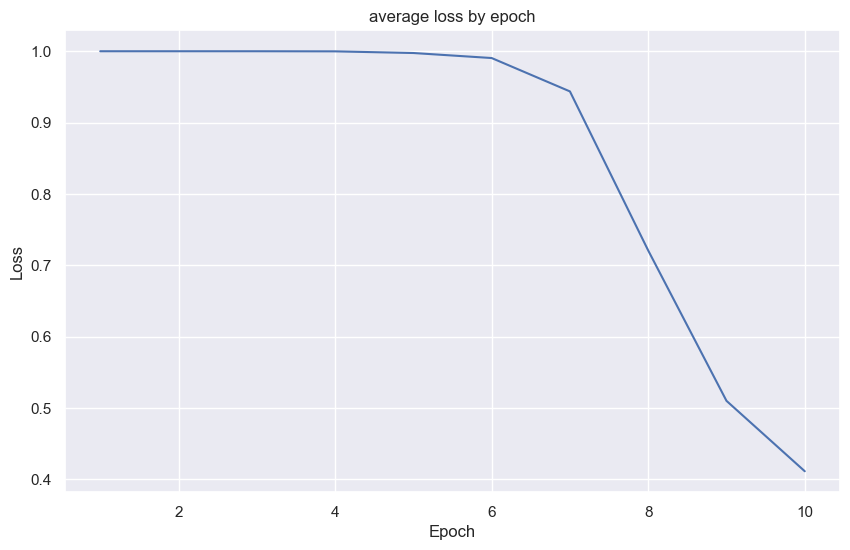

In [49]:
 w1 , b1 , w2 , b2 , w_out ,b_out , loss  = train_ANN(xtrain , ytrain )

In [51]:
def ANN_pred(xtest ,w1 , b1 , w2 , b2 , w_out ,b_out , loss  ):
    pred = []
    for i in range(0 , xtest.shape[0]):
        x = xtest[i] 
        z1 = relu(np.dot(w1 , x) + b1)
        z2 = relu(np.dot(w2 , z1) + b2)
        y = sigmoid(np.dot(w_out , z2) + b_out)
      
        pred.append(np.heaviside(y-0.5 , 1)[0])
    return pred ;

In [52]:
prediction = ANN_pred(xtest ,w1 , b1 , w2 , b2 , w_out ,b_out , loss  )

In [54]:
loss = np.mean(ytest - prediction)
loss

0.0037313432835820895

In [57]:
from sklearn.metrics import accuracy_score , confusion_matrix
cm = confusion_matrix(ytest , prediction)
df_cm = pd.DataFrame(cm , index = [dict_live[i] for i in range(0 ,2)] ,
                    columns= [dict_live[i] for i in range(0,2)])

In [58]:
df_cm

,died,survived
died,140,28
survived,29,71


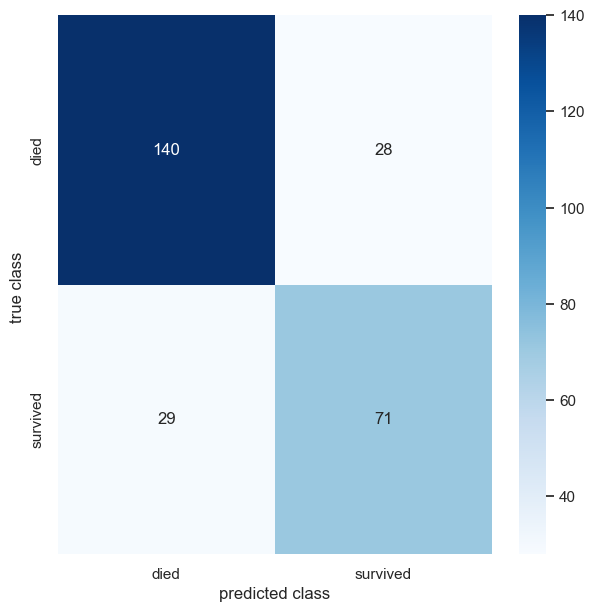

In [60]:
plt.figure(figsize=(7 ,7))
sns.heatmap(df_cm , annot = True , cmap =plt.cm.Blues , fmt = 'g')
plt.xlabel("predicted class")
plt.ylabel("true class ")
plt.show()

In [61]:
accuracy_score(ytest , prediction)

0.7873134328358209